In [1]:
import pandas as pd
import pandas_profiling as pp
import pathmagic
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    
%run ../script/GatherData.py



# Visualize the data


Text(0.5, 1.0, 'Shows the number of files for every label')

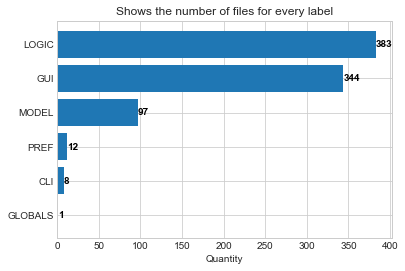

In [2]:
df = Prep.get_raw_dataset_as_dataframe()%matplotlib inline\n",
with pathmagic.context():\n",
    import Preprocess as Prep\n"
    import RelativePaths as RP\n
    import Evaluation as Eva\n",
    \n",
%run ../script/GatherData.py\n"


y_labels = df.Label.unique()
x_quantity = [len(df.loc[df['Label']==label]) for label in y_labels]
new_df = pd.DataFrame({
    'Labels' : y_labels,
    'Quantity' : x_quantity
})
new_df = new_df.sort_values(by=['Quantity'])
plt.style.use("seaborn-whitegrid")
plt.barh(y=new_df.Labels, width=new_df.Quantity)
for i, v in enumerate(new_df.Quantity):
    plt.text(v, i, str(v), color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Quantity')


plt.title('Shows the number of files for every label')

# Evaluate MaxEnt
- Test size: 0.9
- Parsed data: Raw (no parsing)

In [3]:
basic_df = pd.read_csv(str(RP.getDataDirectory() /"rawData.csv"))
df_sliced = Eva.filter_unwanted_labels(basic_df, 'Label', ['GLOBALS', 'CLI'])
test_size=0.9
fold_quantity = 10
feature_representation = CountVectorizer()
evaluate = Eva.Evaluation(df_sliced, feature_representation, test_size, fold_quantity)
classifier , metrics = evaluate.evaluate_MaxEnt()

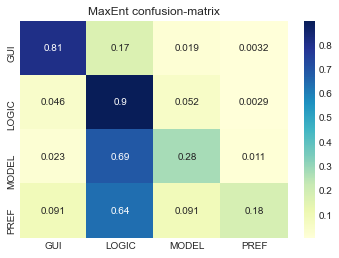

In [4]:
plt.title(metrics.name + " confusion-matrix")
metrics.visualize_confusion_matrix()

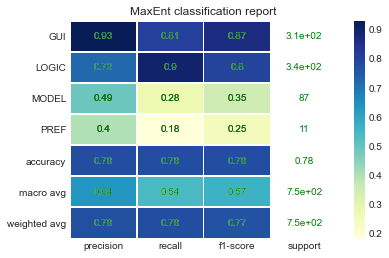

In [5]:
plt.title(metrics.name + " classification report")
metrics.plot_data_info()

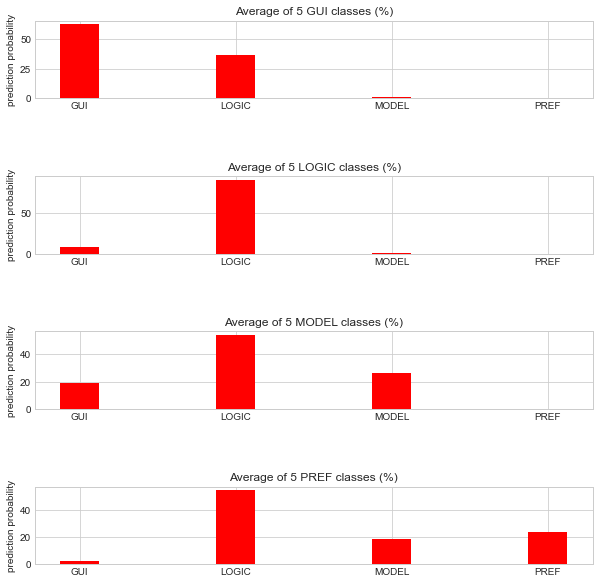

In [6]:
metrics.plot_predictionScoreAverage(classifier)